## Student Details

When submitting, fill your name and ID in this cell. Note that this is a markdown cell.

Student Name and ID: Redij, Puja Nitin [1001651089]

# Programming Assignment 1: 
# Exploratory Analysis over census data for salaries from the year 1994


# Assignment Details

In this assignment, you will conduct a guided exploration over census1994 Dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

# Dataset Details

In this assignment, you will work on census1994 dataset. This data was extracted from the census bureau database.
Extraction was done by Barry Becker from the 1994 Census database. The objective of the survey was to determine whether a person makes over 50K a year or not. 

### census 1994 Dataset

## >50K, <=50K.
## age: continuous.
## workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
## fnlwgt: continuous.
## education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
## education-num: continuous.
## marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
## occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
## relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
## race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
## gender: Female, Male.
## capital-gain: continuous.
## capital-loss: continuous.
## hours-per-week: continuous.
## native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Required Python Packages
You will use the packages imported below in this assignment. 
You will not require any other packages. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt

import seaborn as sb

#For some of the date operations
#import datetime

# Reading Dataset
The Python code below reads the census1994 dataset into a Pandas data frame with the name df_census. 
For this code to work, the file 'census1994.csv' must be in the same folder as the notebook.


In [2]:
#read the csv file into a Pandas data frame
df_census = pd.read_csv('census1994.csv')

#return the first 5 rows of the dataset
df_census.head()

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [3]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

#Before starting with the tasks in the assignment, we need to remove the rows with missing values
#write the code for it here and save the new data frame with the same name as df_census.
###################begin your code.
df_census = df_census.rename(columns={'native-country': 'native_country'})
df_census = df_census.rename(columns={'education-num': 'education_num'})
df_census = df_census.rename(columns={'hours-per-week': 'hours_per_week'})

df_census = df_census[(df_census.WorkClass != ' ?') & (df_census.occupation != ' ?') & (df_census.native_country != ' ?')]
      
###################end your code.


#Task 1-a: Print the details of the df_census data frame (information such as number of rows,columns, name of columns, etc)
print("Task 1-a: Details of df_census data frame are: \n", df_census.info())

#Task 1-b: Find the number of rows and columns in the df_census data frame.
num_rows = df_census.shape[0]
num_cols = df_census.shape[1]
print("\n\nTask 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 


#Task 1-c: Print the descriptive details (min, max, quartiles etc) for 'Age' column of the df_census
print("\n\nTask 1-c: Descriptive details of age is : min - %s and max - %s and Quantile age for 0.1 - %s and Quantile age for 0.25 - %s and Quantile age for 0.5 - %s and Quantile age for 0.75 - %s" % (df_census['Age'].min(), df_census['Age'].max(),df_census['Age'].quantile(0.1),df_census['Age'].quantile(0.25),df_census['Age'].quantile(0.5),df_census['Age'].quantile(0.75)))


#Task 1-d: Print the number of unique values for 'education_num' and 'hours_per_week' columns
num_uniq_1 = df_census['education_num'].nunique()
num_uniq_2 = df_census['hours_per_week'].nunique()
print("\n\nTask 1-d: The number of unique 1### :", num_uniq_1)
print("Task 1-d: The number of unique 2### :", num_uniq_2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 16 columns):
Date              30162 non-null object
Age               30162 non-null int64
WorkClass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education_num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
gender            30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours_per_week    30162 non-null int64
native_country    30162 non-null object
class             30162 non-null object
dtypes: int64(6), object(10)
memory usage: 3.9+ MB
Task 1-a: Details of df_census data frame are: 
 None


Task 1-b: Number of rows:30162 and number of columns:16


Task 1-c: Descriptive details of age is : min - 17 and max - 90 and Quantile age for 0.1 - 2

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. Then, we will apply ranking on the results for some tasks. Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [4]:
#Task 2-a: Find out the sum of Captial Gain for people with education level as Bachelors and HS-Grad.
sum_capital_gain_bachelors = df_census[df_census.education == ' Bachelors'].sum()['capital-gain']
sum_capital_gain_HS_Grad = df_census[df_census.education == ' HS-grad'].sum()['capital-gain']
print ("Task 2-a: The sum of capital gain for education level as bachelors is %s and as HS-Grad is %s" 
       % (sum_capital_gain_bachelors, sum_capital_gain_HS_Grad))


#Task 2-b: Find out the total number of people surveyed in months may, october and december.
#Create a new column for 'Survey_Month' by using 'Date' column
#write the code for extracting the month from the date column here

###############begin your code here
df_census['Survey_Month'] = pd.DatetimeIndex(df_census['Date']).month

###############send you code here

num_surveys_may = df_census[df_census.Survey_Month == 5].Survey_Month.count()
num_surveys_october = df_census[df_census.Survey_Month == 10].Survey_Month.count()
num_surveys_december = df_census[df_census.Survey_Month == 12].Survey_Month.count()
print ("\n\nTask 2-b: The total number of surveys in may is %s, in october is %s, and in december is %s" 
       % (num_surveys_may, num_surveys_october, num_surveys_december))


#Task 2-c: Let us now use multiple filtering criteria
# Find out the total number of surveys in september and november with workclass as private and age less than 50.
num_surveys_september = df_census[(df_census.Survey_Month == 9) & (df_census.WorkClass == " Private") & (df_census.Age < 50)].Survey_Month.count()
num_surveys_november = df_census[(df_census.Survey_Month == 11) & (df_census.WorkClass == " Private") & (df_census.Age < 50)].Survey_Month.count()
print ("\n\nTask 2-c: The total number of surveys that meet the given conditions in september is %s and in november is %s" 
       % (num_surveys_september, num_surveys_november))


#Task 2-d: Find out 3 least surveyed education categories, print their names and corresponding number of surveys for periods January-June and July-December.
top3_least_surveyed_Jan_June = df_census[((df_census.Survey_Month >= 1) & (df_census.Survey_Month <= 6))].groupby('education').count().iloc[:,0].sort_values().head(3)
top3_least_surveyed_July_December = df_census[((df_census.Survey_Month >= 7) & (df_census.Survey_Month <= 12))].groupby('education').count().iloc[:,0].sort_values().head(3)
print ("\n\nTask 2-d: \nThe top 3 least surveyed education categories in January-June: \n%s \n\nThe top 3 least surveyed education categories in July-December: \n%s" 
                     % (top3_least_surveyed_Jan_June,top3_least_surveyed_July_December))


#Task 2-e: Find out top 5 native-countries besides United-States, print their names and number of surveys belonging to each.
top5_most_surveyed_native_countries = df_census[df_census.native_country != ' United-States'].groupby('native_country').count().iloc[:,0].sort_values(ascending = False).head(5)
print ("\n\nTask 2-e: \nThe top 5 most surveyed native countries : \n%s" 
                     % (top5_most_surveyed_native_countries))


#Task 2-f: Find out Top-5 native-countries with the most number of samples belonging to class >50K
top5_native_countries = df_census[df_census['class'] == ' >50K'].groupby('native_country').count().iloc[:,0].sort_values(ascending = False).head(5)
print ("\n\nTask 2-f: \nThe top 5 native countries with the most number of surveys with class >50K: \n%s" 
                     % (top5_native_countries))


Task 2-a: The sum of capital gain for education level as bachelors is 8751485 and as HS-Grad is 5799557


Task 2-b: The total number of surveys in may is 2510, in october is 2510, and in december is 2602


Task 2-c: The total number of surveys that meet the given conditions in september is 1465 and in november is 1507


Task 2-d: 
The top 3 least surveyed education categories in January-June: 
education
 Preschool     19
 1st-4th       74
 5th-6th      156
Name: Date, dtype: int64 

The top 3 least surveyed education categories in July-December: 
education
 Preschool     26
 1st-4th       77
 5th-6th      132
Name: Date, dtype: int64


Task 2-e: 
The top 5 most surveyed native countries : 
native_country
 Mexico         610
 Philippines    188
 Germany        128
 Puerto-Rico    109
 Canada         107
Name: Date, dtype: int64


Task 2-f: 
The top 5 native countries with the most number of surveys with class >50K: 
native_country
 United-States    6995
 Philippines        60
 Germany  

# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

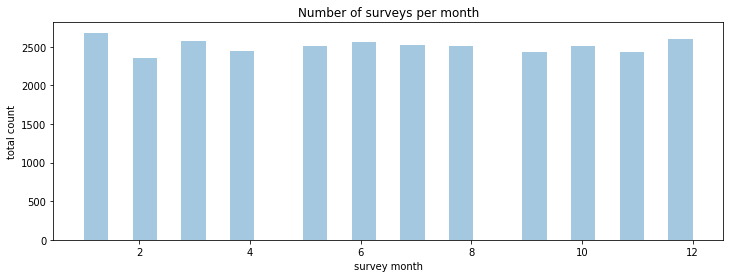

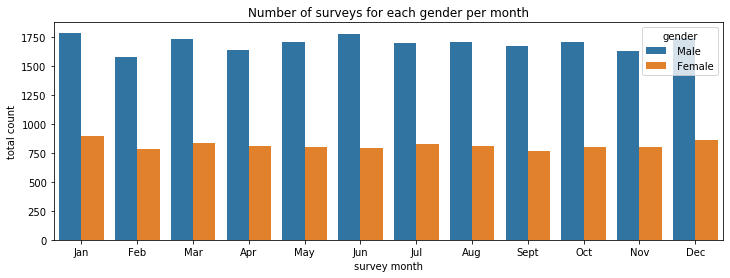

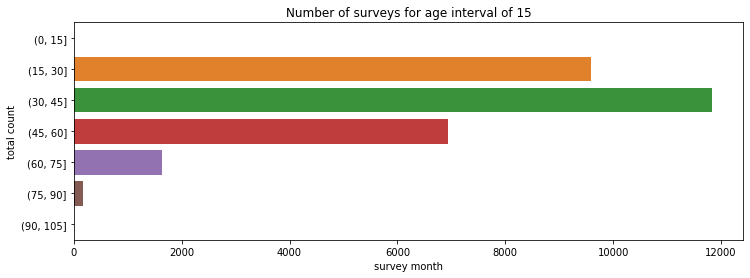

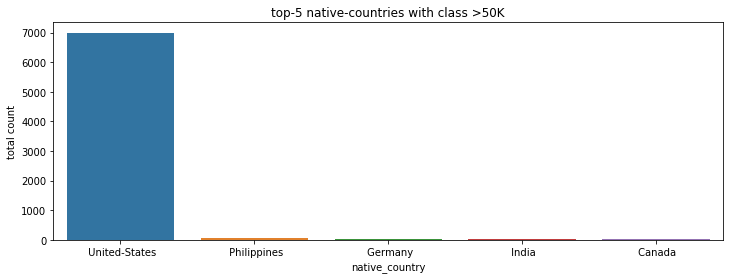

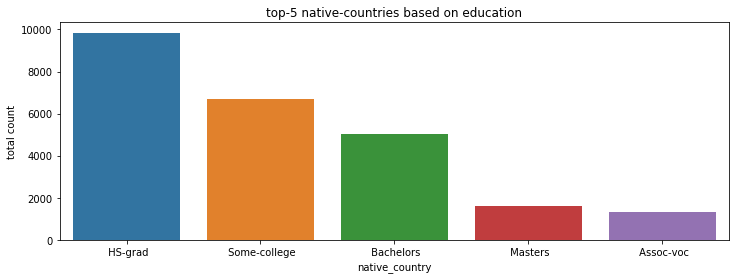

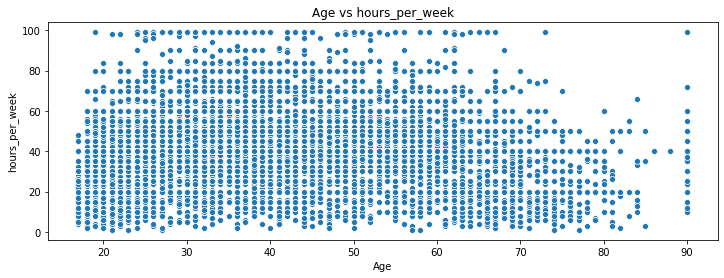

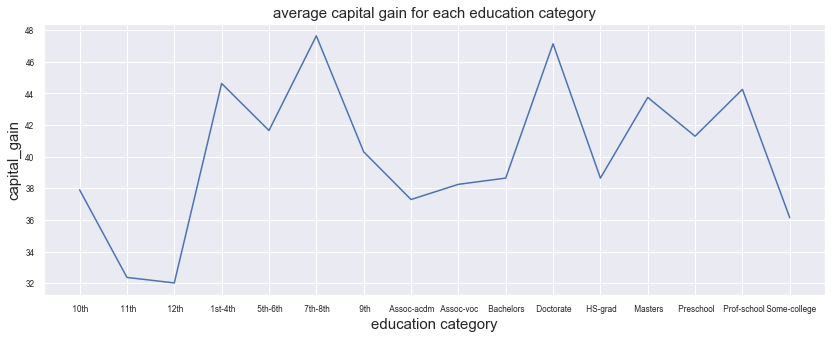

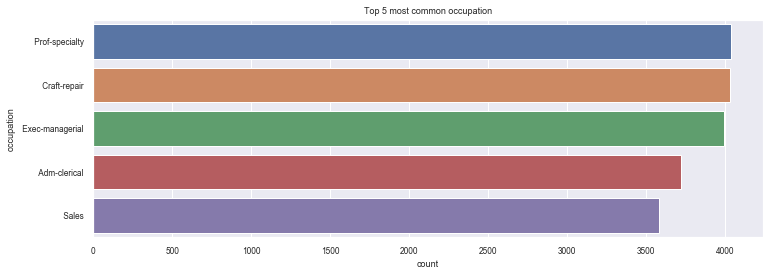

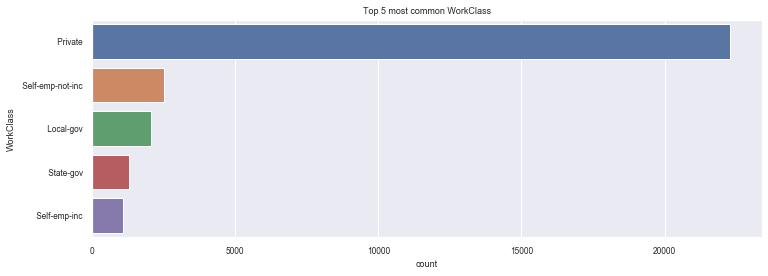

In [5]:
#Task 3-a: Draw a histogram for total number of surveys taken each month. Dislpay months with their corresponding numbers(Eg: January is 1) 
#########################begin code for Task 3-a
plt.figure(figsize=(12, 4))
sb.distplot(df_census['Survey_Month'],kde = False)
plt.title('Number of surveys per month')
plt.xlabel('survey month')
plt.ylabel('total count')
plt.show()
#########################end code for Task 3-a


#Task 3-b: Draw a vertical bar chart for total number of surveys taken for each gender for each month. Display months with their corresponding names.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task 3-b
plt.figure(figsize=(12, 4))
g = sb.countplot(x = "Survey_Month", hue = "gender", data = df_census)
plt.title('Number of surveys for each gender per month')
g.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.xlabel('survey month')
plt.ylabel('total count')
plt.show()
#########################end code for Task 3-b

#Task 3-c: Draw a horizontal bar chart for number of surveys taken with respect to age feature keeping the age interval as 15.
# Remember to make the bar chart into a horizontal bar chart
#########################begin code for Task 3-c
range = [0,15,30,45,60,75,90,105]
df = df_census.groupby(pd.cut(df_census.Age, range)).count().iloc[:,0].reset_index(name = "count")
plt.figure(figsize=(12, 4))
sb.barplot(x = "count",y = "Age", data=df)
plt.title('Number of surveys for age interval of 15')
plt.xlabel('survey month')
plt.ylabel('total count')
plt.show()
#########################end code for Task 3-c


#Task 3-d: Draw a "vertical" bar chart that lists the top-5 native-countries based on the number of samples with class >50K.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task 3-d
top5_native_countries_with_more_than_50k = df_census[df_census['class'] == ' >50K'].groupby('native_country').count().iloc[:,0].sort_values(ascending = False).head(5).reset_index(name = "count")
plt.figure(figsize=(12, 4))
sb.barplot(x = "native_country", y= "count", data = top5_native_countries_with_more_than_50k)
plt.title('top-5 native-countries with class >50K')
plt.xlabel('native_country')
plt.ylabel('total count')
plt.show()
#########################end code for Task 3-d


#Task 3-e: Now repeat Task 3-d based on education (again top-5)
#########################begin code for Task 3-e
top5_native_countries_based_on_education = df_census.groupby('education').count().iloc[:,0].sort_values(ascending = False).head(5).reset_index(name = "count")
plt.figure(figsize=(12, 4))
sb.barplot(x = "education", y= "count", data = top5_native_countries_based_on_education)
plt.title('top-5 native-countries based on education')
plt.xlabel('native_country')
plt.ylabel('total count')
plt.show()
#########################end code for Task 3-e


#Task 3-f: Draw a scatter plot for age vs hours per week.
#########################begin code for Task 3-f
plt.figure(figsize=(12, 4))
sb.scatterplot(x="Age", y="hours_per_week", data=df_census)
plt.title('Age vs hours_per_week')
plt.xlabel('Age')
plt.ylabel('hours_per_week')
plt.show()
#########################end code for Task 3-f


#Task 3-g: Draw a line chart showing average capital gain for each education category.
# X-axis : education category, Y-axis : the avg capital gain
#########################begin code for Task 3-g
plt.figure(figsize=(14, 5))
sb.set(font_scale=0.75)
avg_capital_gain_education = df_census.groupby('education').mean().iloc[:,0].reset_index(name = "capital_gain")
# print(avg_capital_gain_education)
sb.lineplot(x="education", y="capital_gain", data=avg_capital_gain_education)
plt.title('average capital gain for each education category',fontsize=15)
plt.xlabel('education category',fontsize=15)
plt.ylabel('capital_gain',fontsize=15)
plt.show()
#########################end code for Task 3-g


#Task 3-h: Draw a 'horizontal' bar chart for the top-5 most common occupation. 
#########################begin code for Task 3-h
top5_occupation = df_census.groupby('occupation').count().iloc[:,0].sort_values(ascending = False).head(5).reset_index(name = "count")
plt.figure(figsize=(12, 4))
sb.barplot(x = "count",y = "occupation", data=top5_occupation)
plt.title('Top 5 most common occupation')
plt.xlabel('count')
plt.ylabel('occupation')
plt.show()
#########################end code for Task 3-h


#Task 3-i: Draw a 'horizontal' bar chart for the top-5 most common workclass. 
#########################begin code for Task 3-i
top5_WorkClass = df_census.groupby('WorkClass').count().iloc[:,0].sort_values(ascending = False).head(5).reset_index(name = "count")
plt.figure(figsize=(12, 4))
sb.barplot(x = "count", y = "WorkClass", data=top5_WorkClass)
plt.title('Top 5 most common WorkClass')
plt.xlabel('count')
plt.ylabel('WorkClass')
plt.show()

#########################end code for Task 3-i





# Task 4: 
Find out an interesting information from your census1994 dataset. Create a visualization for it. 
This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visulization). 

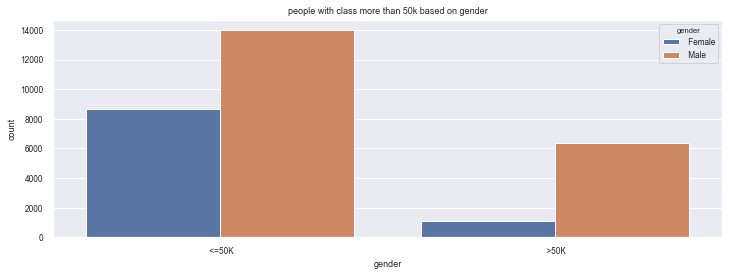

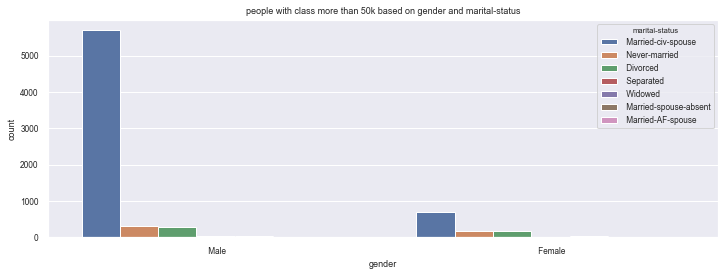

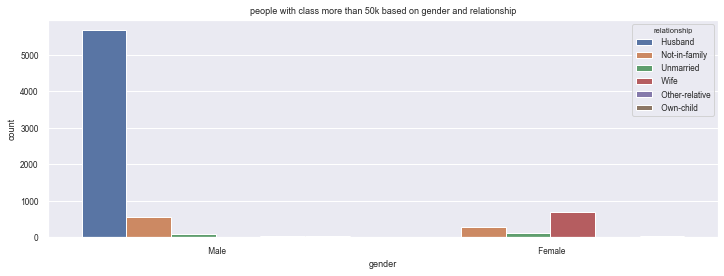

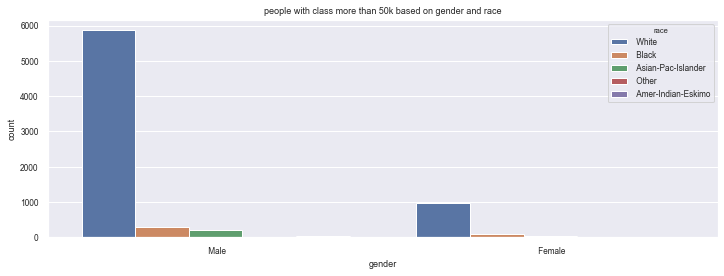

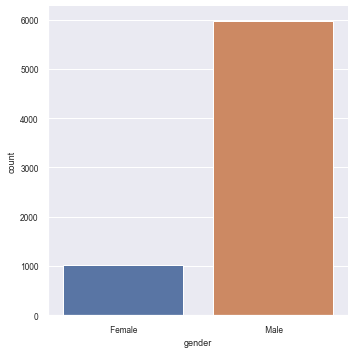

C:\Users\16824\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


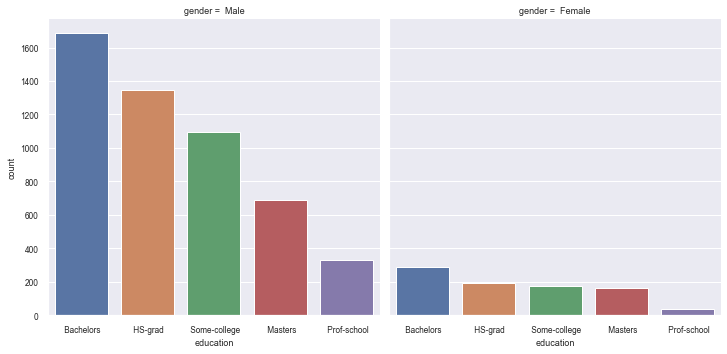

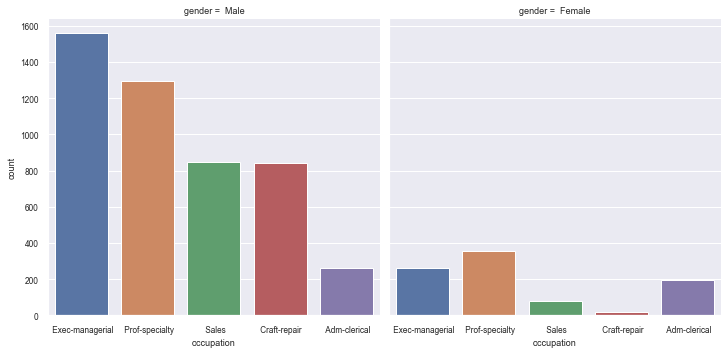

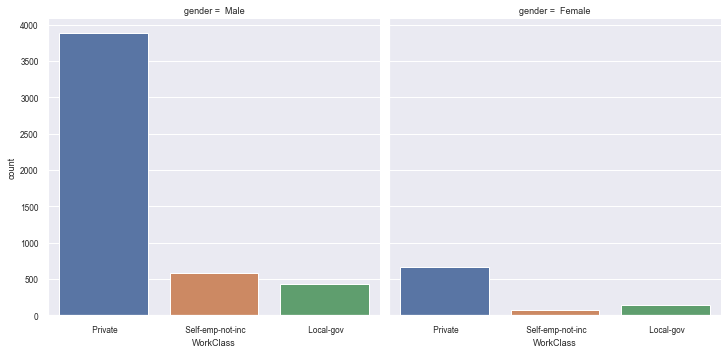

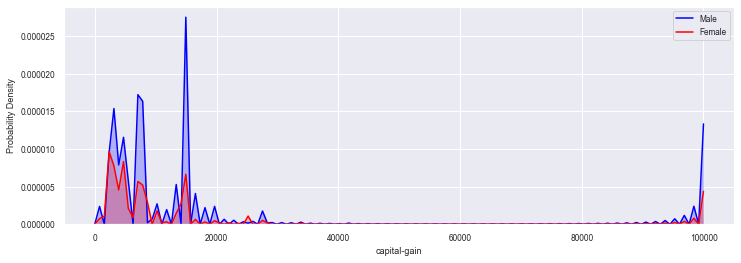

<Figure size 864x288 with 0 Axes>

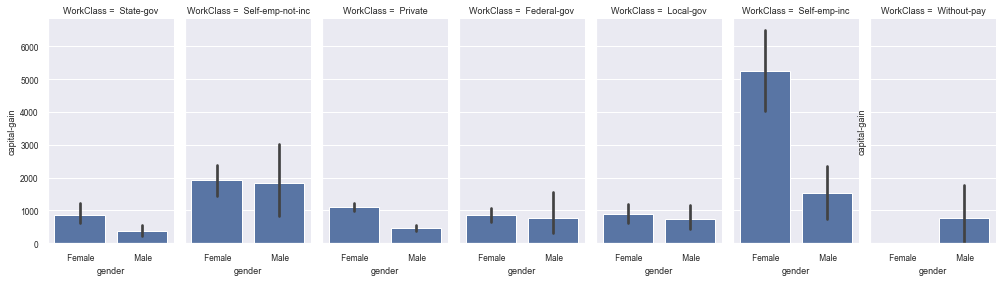

In [6]:
#########################begin code for Task 4
more_than_50k = df_census.groupby(['class','gender']).count().iloc[:,0].reset_index(name = "count")
plt.figure(figsize=(12, 4))
sb.barplot(x = "class", y = "count", hue = "gender", data = more_than_50k)
plt.title('people with class more than 50k based on gender')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

a = df_census[df_census['class'] == ' >50K']
plt.figure(figsize=(12, 4))
sb.countplot(x="gender", hue="marital-status",  data=a);
plt.title('people with class more than 50k based on gender and marital-status')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

plt.figure(figsize=(12, 4))
sb.countplot(x="gender", hue="relationship",  data=a);
plt.title('people with class more than 50k based on gender and relationship')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

plt.figure(figsize=(12, 4))
sb.countplot(x="gender", hue="race",  data=a);
plt.title('people with class more than 50k based on gender and race')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()


US_more_than_50k_based_on_gender = df_census[(df_census['native_country'] == ' United-States') & (df_census['class'] == ' >50K')].groupby(['gender']).count().iloc[:,0].reset_index(name = "count")
sb.catplot(x="gender", y="count", kind="bar", data=US_more_than_50k_based_on_gender);
# plt.title('People from United-States with class more than 50k based on gender')
# plt.xlabel('gender')
# plt.ylabel('count')
plt.show()

# plt.figure(figsize=(12, 4))
a = df_census[(df_census['class'] == ' >50K') & (df_census['native_country'] == ' United-States')]
# plt.title('People from United-States with class more than 50k based on gender,education')
sb.catplot(x="education", col="gender",data=a, kind="count", order=a.education.value_counts().iloc[:5].index);
# plt.xlabel('gender')
# plt.ylabel('count')
# plt.show()

# plt.figure(figsize=(12, 4))
a = df_census[(df_census['class'] == ' >50K') & (df_census['native_country'] == ' United-States')]
# plt.title('People from United-States with class more than 50k based on gender,occupation')
sb.catplot(x="occupation", col="gender",data=a, kind="count", order=a.occupation.value_counts().iloc[:5].index);
# plt.xlabel('gender')
# plt.ylabel('count')
# plt.show()

# plt.figure(figsize=(12, 4))
a = df_census[(df_census['class'] == ' >50K') & (df_census['native_country'] == ' United-States')]
# plt.title('People from United-States with class more than 50k based on gender,WorkClass')
sb.catplot(x="WorkClass", col="gender",data=a, kind="count", order=a.WorkClass.value_counts().iloc[:3].index);
# plt.xlabel('gender')
# plt.ylabel('count')
# plt.show()

plt.figure(figsize=(12, 4))
sb.kdeplot(df_census.loc[(df_census['gender']==' Male'),'capital-gain'], color='blue', shade=True, Label='Male') 
sb.kdeplot(df_census.loc[(df_census['gender']==' Female'),'capital-gain'], color='red', shade=True, Label='Female')
plt.xlabel('capital-gain') 
plt.ylabel('Probability Density') 
# plt.show()

plt.figure(figsize=(12, 4))
g = sb.FacetGrid(df_census, col="WorkClass", height=4, aspect=.5)
g.map(sb.barplot, "gender", "capital-gain");
plt.xlabel('gender') 
plt.ylabel('capital-gain') 
plt.show()

#########################end code for Task 4



# Grading

Task 1: 10 points
Task 2: 30 points
Task 3: 40 points
Task 4: 20 points
